In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df15d = pd.read_csv(os.path.join('df15D.csv'))
del df15d['Unnamed: 0']
del df15d['Year']
del df15d['Month']
del df15d['Day']
del df15d['Day_of_Week']
del df15d['Weekend']
del df15d['Datetime']

df15d.head()

MW Utility  Temp(f)
0  1652.0  DAYTON     39.2
1  1631.0  DAYTON     37.4
2  1641.0  DAYTON     36.0
3  1707.0  DAYTON     35.6
4  1821.0  DAYTON     35.6

In [3]:
df_2015pos = df15d[df15d['Temp(f)'] >= 60].copy()
df_2015neg = df15d[df15d['Temp(f)'] < 60].copy()

In [4]:
X = df_2015pos["Temp(f)"].values.reshape(-1, 1)
y = df_2015pos["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (2528, 1) (2528, 1)


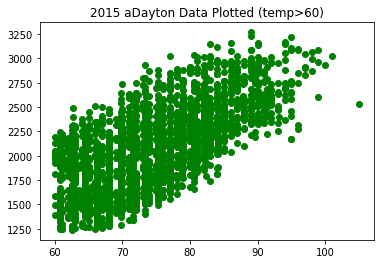

In [5]:
plt.scatter(X, y,color='g')
plt.title("2015 aDayton Data Plotted (temp>60)")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4000)

In [17]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.44480034221405224
Testing Score: 0.48618985083420135


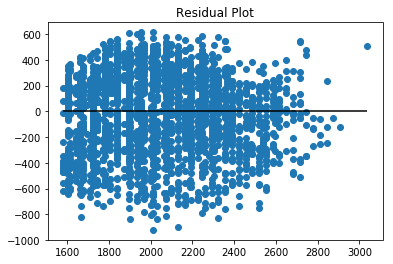

In [18]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

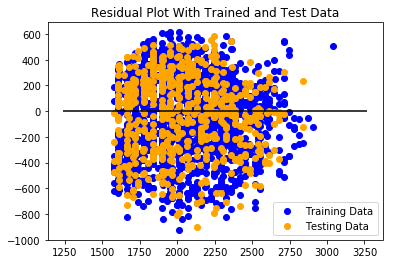

In [19]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [20]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[32.42431975]]
y-axis intercept:  [-366.94424575]


In [23]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  -366.94424575+ 32.42431975 * x_min
y_max = -366.94424575+ 32.42431975 * x_max

Actual Min Value: 1238.0
Predicted Min Value: [[1578.83918238]]
Actual Max Value: 3269.0
Predicted Max Value: [[3037.93357107]]


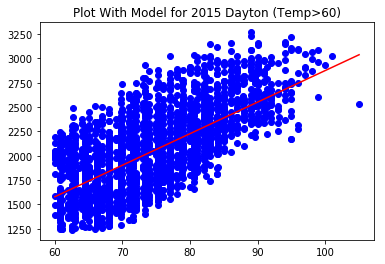

In [25]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2015 Dayton (Temp>60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [26]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [1284.]
Predicted output: [1610.93925893]
Prediction Error: [326.93925893]


In [27]:
X = df_2015neg["Temp(f)"].values.reshape(-1, 1)
y = df_2015neg["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (1065, 1) (1065, 1)


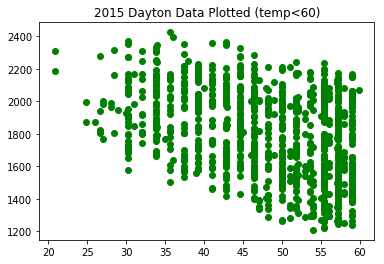

In [29]:
plt.scatter(X, y,color='g')
plt.title("2015 Dayton Data Plotted (temp<60)")
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=600)

In [39]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.10810686071792719
Testing Score: 0.12897429032816476


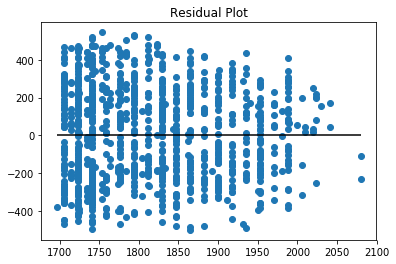

In [40]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

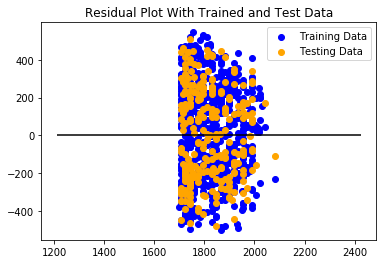

In [41]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [42]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-9.83235831]]
y-axis intercept:  [2285.08662983]


In [43]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  2285.08662983+ (-9.83235831 * x_min)
y_max = 2285.08662983+ (-9.83235831 * x_max)

Actual Min Value: 1209.0
Predicted Min Value: [[2080.3769299]]
Actual Max Value: 2426.0
Predicted Max Value: [[1696.32501446]]


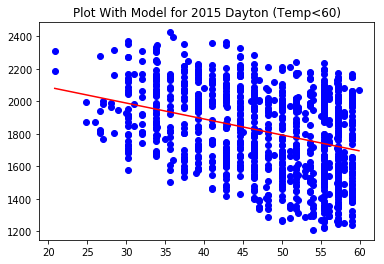

In [44]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2015 Dayton (Temp<60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [45]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [1652.]
Predicted output: [1899.65818423]
Prediction Error: [247.65818423]


In [46]:
modeldf = pd.DataFrame()
for x in range(len(predictions)):
   modeldf = modeldf.append({"Predicted": predictions[x][0], "Actual": y[x][0], "Error": predictions[x][0] - y[x][0]},ignore_index = True)

In [47]:
modeldf

Actual       Error    Predicted
0     1652.0  247.658184  1899.658184
1     1631.0  286.356429  1917.356429
2     1641.0  290.121731  1931.121731
3     1707.0  228.054674  1935.054674
4     1821.0  114.054674  1935.054674
5     1920.0   15.054674  1935.054674
6     1970.0  -34.945326  1935.054674
7     2016.0  -80.945326  1935.054674
8     2072.0 -119.247081  1952.752919
9     2070.0 -117.247081  1952.752919
10    2072.0 -119.247081  1952.752919
11    2058.0 -105.247081  1952.752919
12    2048.0  -95.247081  1952.752919
13    2157.0 -204.247081  1952.752919
14    2137.0 -166.548836  1970.451164
15    1982.0   -1.618154  1980.381846
16    1925.0   45.451164  1970.451164
17    1632.0  249.959939  1881.959939
18    1599.0  282.959939  1881.959939
19    1621.0  278.658184  1899.658184
20    1837.0   62.658184  1899.658184
21    1951.0  -51.341816  1899.658184
22    1985.0  -85.341816  1899.658184
23    2041.0 -141.341816  1899.658184
24    2046.0 -146.341816  1899.658184
25    2039.0 -139.341816  1899.658184
26    2016.0 -116.341816  1899.658184
27    2001.0 -119.040061  1881.959939
28    2123.0 -241.040061  1881.959939
29    2140.0 -275.738306  1864.261694
...      ...         ...          ...
1035  1489.0  215.977490  1704.977490
1036  1562.0  142.977490  1704.977490
1037  1617.0   87.977490  1704.977490
1038  1660.0   44.977490  1704.977490
1039  1656.0   66.675735  1722.675735
1040  1658.0   56.908172  1714.908172
1041  2151.0 -446.022510  1704.977490
1042  1591.0  113.977490  1704.977490
1043  1771.0  -66.022510  1704.977490
1044  1852.0 -129.324265  1722.675735
1045  1921.0 -198.324265  1722.675735
1046  2014.0 -279.427112  1734.572888
1047  2091.0 -350.626020  1740.373980
1048  2152.0 -447.022510  1704.977490
1049  1777.0  -72.022510  1704.977490
1050  1863.0 -148.091828  1714.908172
1051  1924.0 -209.091828  1714.908172
1052  1998.0 -275.324265  1722.675735
1053  2043.0 -302.626020  1740.373980
1054  2040.0 -335.022510  1704.977490
1055  1591.0  113.977490  1704.977490
1056  1715.0    7.675735  1722.675735
1057  1829.0 -124.022510  1704.977490
1058  1926.0 -211.091828  1714.908172
1059  2028.0 -305.324265  1722.675735
1060  2110.0 -387.324265  1722.675735
1061  1393.0  311.977490  1704.977490
1062  1487.0  217.977490  1704.977490
1063  1546.0  158.977490  1704.977490
1064  2073.0 -376.674986  1696.325014

[1065 rows x 3 columns]